#                    TASK-1  Iris_Flowers_Classification_ML_Project 

PADMAPPA KARIYALLAPPANAVAR 

## Import libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()

## Load the Dataset

In [39]:
Iris_data = pd.read_csv("Iris.csv")
Iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Data Preprocessing

In [40]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


Data Analysis

In [41]:
Iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [42]:
Iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Checking NUll values in the Dataset

In [43]:
Iris_data.count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

Summary of the Dataset

In [45]:
Iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Data Visualization

<AxesSubplot:>

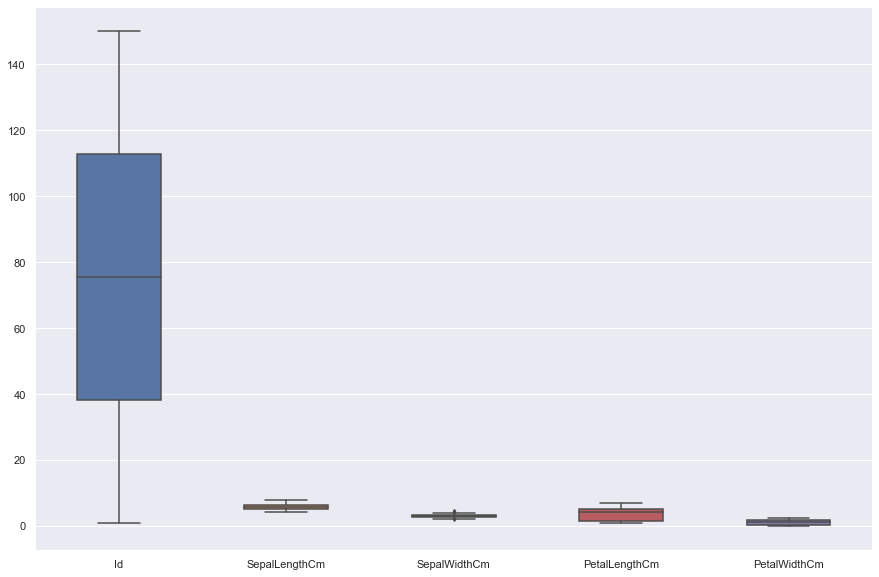

In [46]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=Iris_data,width=0.5, ax=ax, fliersize=3)

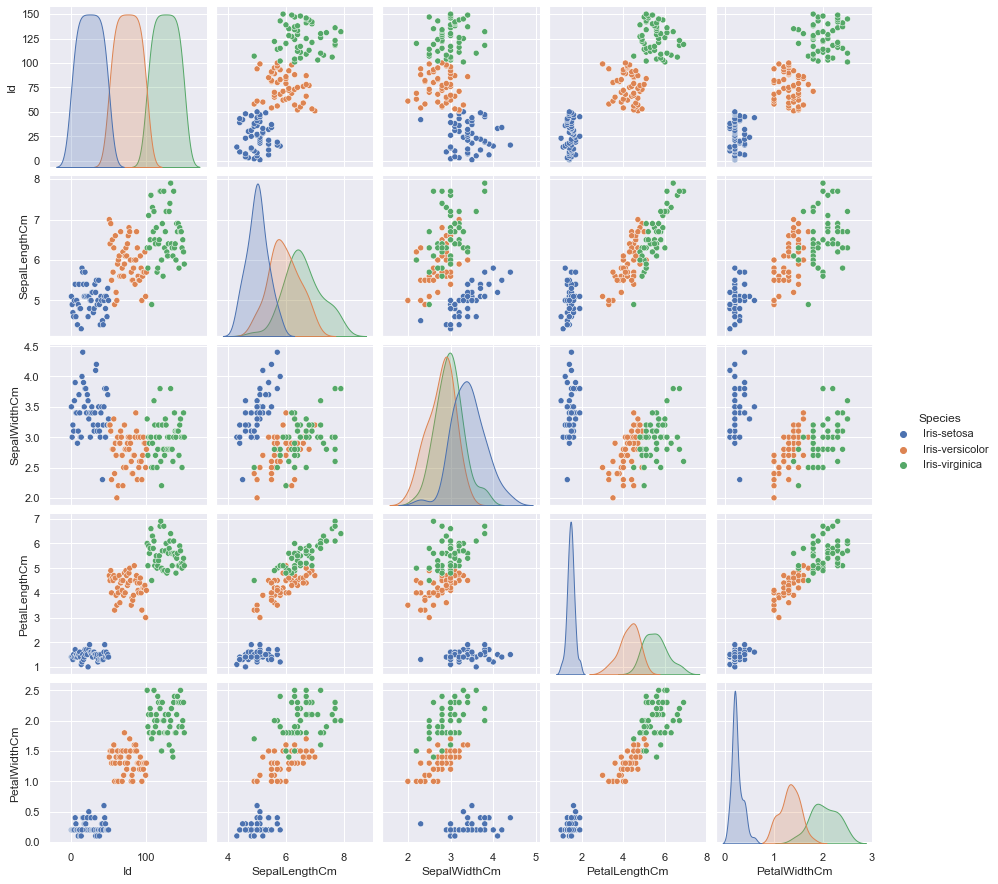

In [47]:
sns.pairplot(data=Iris_data, hue="Species")
plt.show()

## Finding Co-relation

In [48]:
Iris_data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


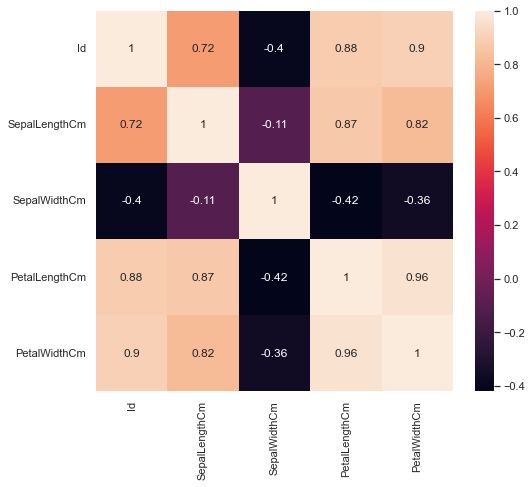

In [49]:
plt.figure(figsize=(8,7))
sns.heatmap(Iris_data.corr(),annot=True)
plt.show()

## Correlation

<AxesSubplot:>

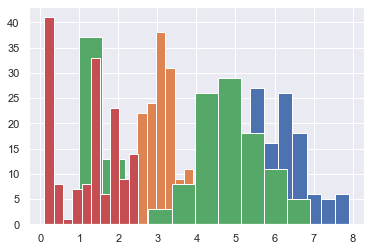

In [50]:
Iris_data['SepalLengthCm'].hist()
Iris_data['SepalWidthCm'].hist()
Iris_data['PetalLengthCm'].hist()
Iris_data['PetalWidthCm'].hist()

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

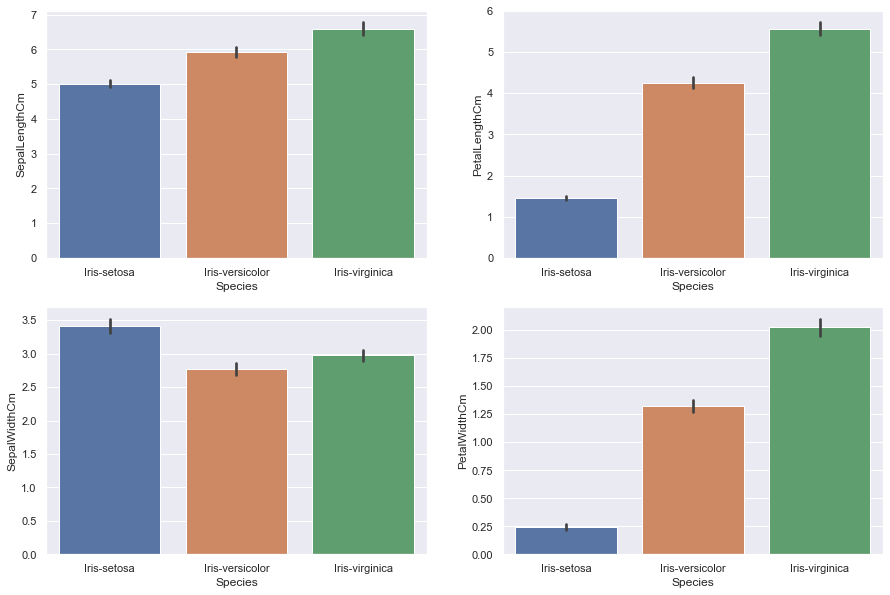

In [51]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x='Species', y='SepalLengthCm', data=Iris_data)
plt.subplot(2,2,2)
sns.barplot(x='Species', y='PetalLengthCm', data=Iris_data)
plt.subplot(2,2,3)
sns.barplot(x='Species', y='SepalWidthCm', data=Iris_data)
plt.subplot(2,2,4)
sns.barplot(x='Species', y='PetalWidthCm', data=Iris_data)

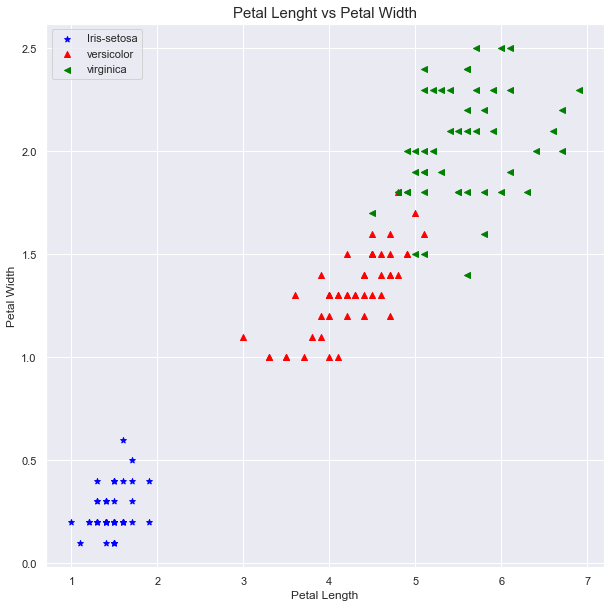

In [52]:
setosa=Iris_data[Iris_data['Species']=="Iris-setosa"]
versicolor=Iris_data[Iris_data['Species']=="Iris-versicolor"]
virginica=Iris_data[Iris_data['Species']=="Iris-virginica"]

plt.figure(figsize=(10,10))
plt.scatter(setosa['PetalLengthCm'],setosa['PetalWidthCm'], c="blue", label="Iris-setosa", marker='*')
plt.scatter(versicolor['PetalLengthCm'],versicolor['PetalWidthCm'], c="red", label="versicolor", marker='^')
plt.scatter(virginica['PetalLengthCm'],virginica['PetalWidthCm'], c="green", label="virginica", marker='<')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Petal Lenght vs Petal Width", fontsize=15)
plt.legend()
plt.show()

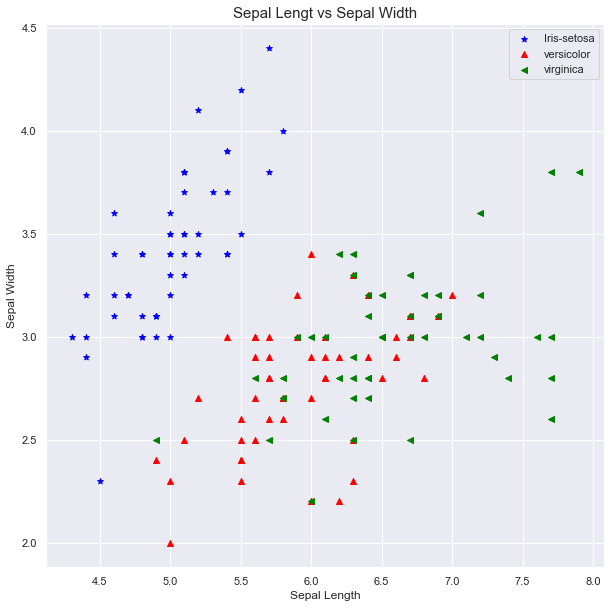

In [53]:
setosa=Iris_data[Iris_data['Species']=="Iris-setosa"]
versicolor=Iris_data[Iris_data['Species']=="Iris-versicolor"]
virginica=Iris_data[Iris_data['Species']=="Iris-virginica"]

plt.figure(figsize=(10,10))
plt.scatter(setosa['SepalLengthCm'],setosa['SepalWidthCm'], c="blue", label="Iris-setosa", marker='*')
plt.scatter(versicolor['SepalLengthCm'],versicolor['SepalWidthCm'], c="red", label="versicolor", marker='^')
plt.scatter(virginica['SepalLengthCm'],virginica['SepalWidthCm'], c="green", label="virginica", marker='<')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Lengt vs Sepal Width", fontsize=15)
plt.legend()
plt.show()

In [54]:
x=Iris_data.drop(columns="Species")
y=Iris_data["Species"]

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state = 1)

In [57]:
x_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
11,12,4.8,3.4,1.6,0.2
113,114,5.7,2.5,5.0,2.0
123,124,6.3,2.7,4.9,1.8
12,13,4.8,3.0,1.4,0.1
2,3,4.7,3.2,1.3,0.2


In [58]:
x_test.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,15,5.8,4.0,1.2,0.2
98,99,5.1,2.5,3.0,1.1
75,76,6.6,3.0,4.4,1.4
16,17,5.4,3.9,1.3,0.4
131,132,7.9,3.8,6.4,2.0


In [60]:
y_train.head()

11        Iris-setosa
113    Iris-virginica
123    Iris-virginica
12        Iris-setosa
2         Iris-setosa
Name: Species, dtype: object

In [61]:
y_test.head()

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
Name: Species, dtype: object

In [62]:
print("x_train ", len(x_train))
print("x_test ", len(x_test))
print("y_train ", len(y_train))
print("y_test ", len(y_test))

x_train  90
x_test  60
y_train  90
y_test  60


## Model Building 

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [74]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [64]:
LogisticRegression(solver='lbfgs', max_iter=100)

LogisticRegression()

In [76]:
predict = model.predict(x_test)
print('predicted the vlaues on the test data',predict)

predicted the vlaues on the test data ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor

In [77]:
y_test_pred=model.predict(x_test)
y_train_pred=model.predict(x_train)

In [78]:
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Test Accuracy    :",  accuracy_score(y_test, y_test_pred))

Training Accuracy:  1.0
Test Accuracy    : 1.0


In [86]:
from sklearn.neighbors import KNeighborsClassifier
Classifier = KNeighborsClassifier(n_neighbors = 9, metric='minkowski', p = 2 )
Classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

## DecisionTreeClassifier

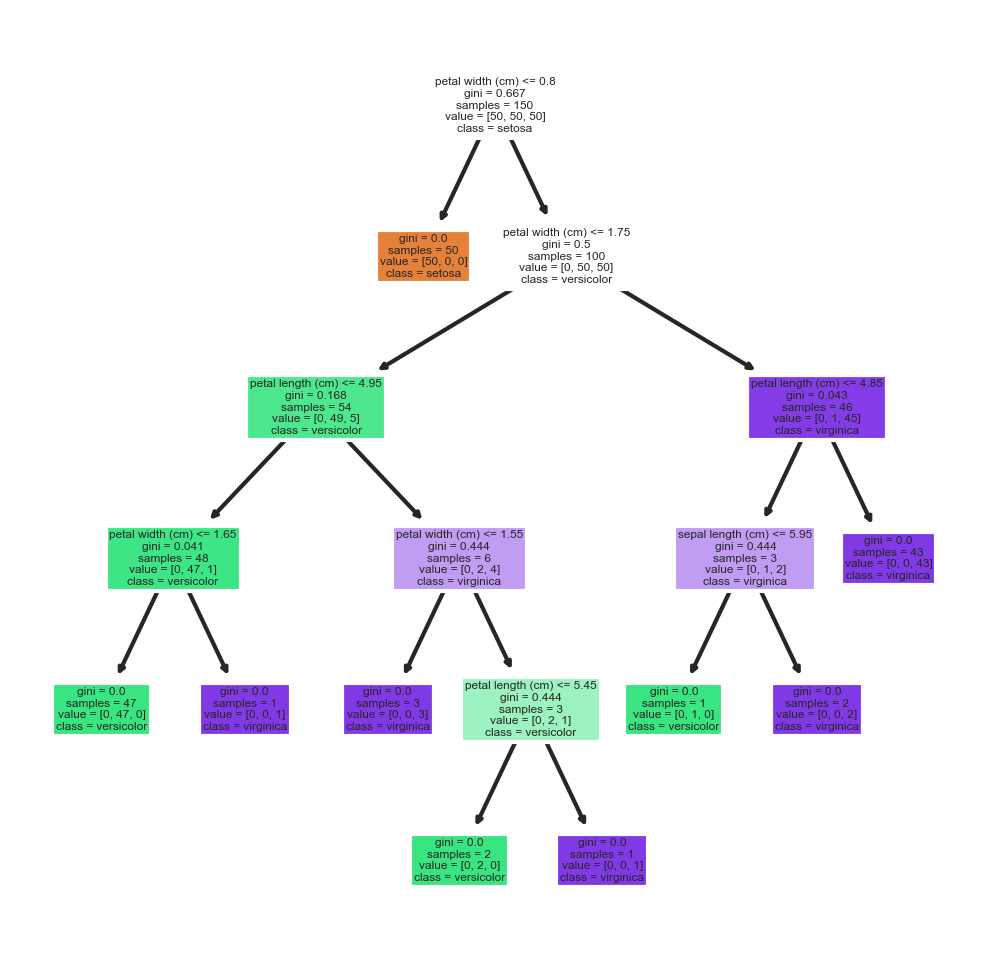

In [88]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X, y = load_iris(return_X_y=True)

clf = DecisionTreeClassifier(max_depth = 5)

clf.fit(X, y)

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,
           feature_names = fn, 
           class_names=cn,
           filled = True);

## Confusion Matrix

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


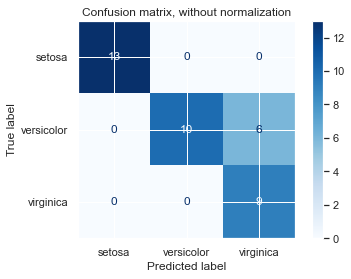

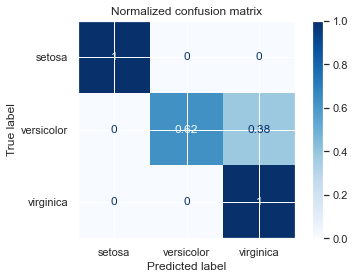

In [90]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)


titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

 #                                        THANK YOU....!!!  